In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_1 = pd.read_csv("C:/Projetos_AnaliseDados/SQL_Project_Int\queries/chart1_customer_segmentation.csv")

print(df_1)

  customer_segment     total_ltv  customer_count   avg_ltv  avg_ltv_percentage
0    3 -High-Value  1.354293e+08           12372  10946.43            0.782418
1    2 - Mid-Value  6.663645e+07           24743   2693.14            0.192498
2    1 - Low_Value  4.341809e+06           12372    350.94            0.025084


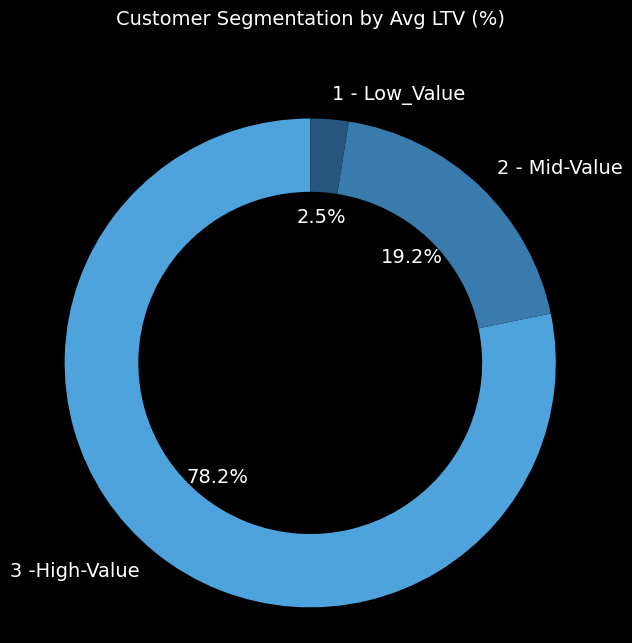

In [17]:
# Estilo escuro para o gráfico
plt.style.use('dark_background')

# Dados para o gráfico
labels = df_1['customer_segment']
sizes = df_1['avg_ltv_percentage'] * 100  # converte para porcentagem
colors = ['#4FA3DD', '#3A7BAE', '#26557F']  # tons de azul

# Criação do gráfico de rosca
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.3)
)

# Ajuste do texto (cor branca para contraste)
for text in texts + autotexts:
    text.set_color('white')
    text.set_fontsize(14)

# Título do gráfico
ax.set_title("Customer Segmentation by Avg LTV (%)", color='white', fontsize=14, pad=50)
ax.axis('equal')  # garante formato de círculo

# Salvar a imagem (altere o caminho conforme sua máquina)
plt.savefig("C:/Projetos_AnaliseDados/SQL_Project_Int/images/1_image.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
df_2 = pd.read_csv("C:/Projetos_AnaliseDados/SQL_Project_Int\queries/chart2_cohort_analysis.csv")

print(df_2)

   cohort_year  customer_revenue
0         2015           2564.82
1         2016           2896.42
2         2017           2893.68
3         2018           2655.62
4         2019           2868.48
5         2020           2328.81
6         2021           2567.89
7         2022           2387.08
8         2023           2188.55
9         2024           1972.03


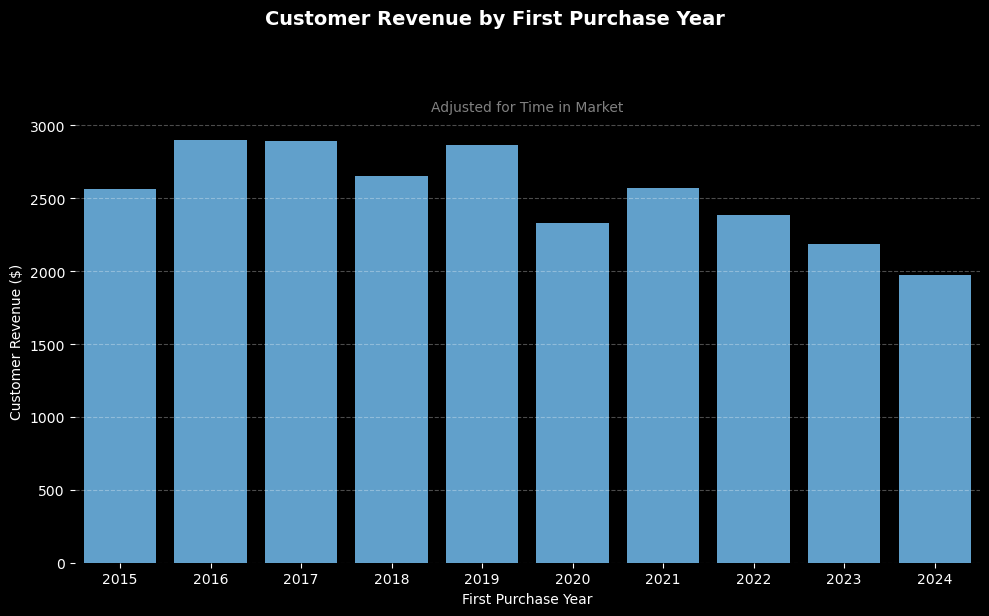

In [20]:
# Estilo escuro
plt.style.use("dark_background")

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras com cor única
sns.barplot(
    data=df_2,
    x='cohort_year',
    y='customer_revenue',
    color='#4FA3DD',
    ax=ax
)

# Título principal (usando suptitle)
plt.suptitle("Customer Revenue by First Purchase Year", fontsize=14, weight='bold', y=1.02)

# Subtítulo (dentro do ax, logo abaixo do título)
ax.set_title("Adjusted for Time in Market", fontsize=10, color='gray')

# Eixos
ax.set_xlabel("First Purchase Year")
ax.set_ylabel("Customer Revenue ($)")

# Remover contornos do gráfico
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Grid discreto no eixo Y
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.xaxis.grid(False)

# Ajustar layout final
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Para dar espaço ao suptitle


# Salvar imagem
save_path = r'C:\Projetos_AnaliseDados\SQL_Project_Int\images\2_image.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')  # Salva com boa resolução


plt.show()

In [21]:
df_3 = pd.read_csv("C:/Projetos_AnaliseDados/SQL_Project_Int\queries/chart3_retention_analysis.csv")

print(df_3)

    cohort_year customer_status  num_customers  total_customers  \
0          2015          Active            237             2825   
1          2015         Churned           2588             2825   
2          2016          Active            311             3397   
3          2016         Churned           3086             3397   
4          2017          Active            385             4068   
5          2017         Churned           3683             4068   
6          2018          Active            704             7446   
7          2018         Churned           6742             7446   
8          2019          Active            687             7755   
9          2019         Churned           7068             7755   
10         2020          Active            283             3031   
11         2020         Churned           2748             3031   
12         2021          Active            442             4663   
13         2021         Churned           4221             466

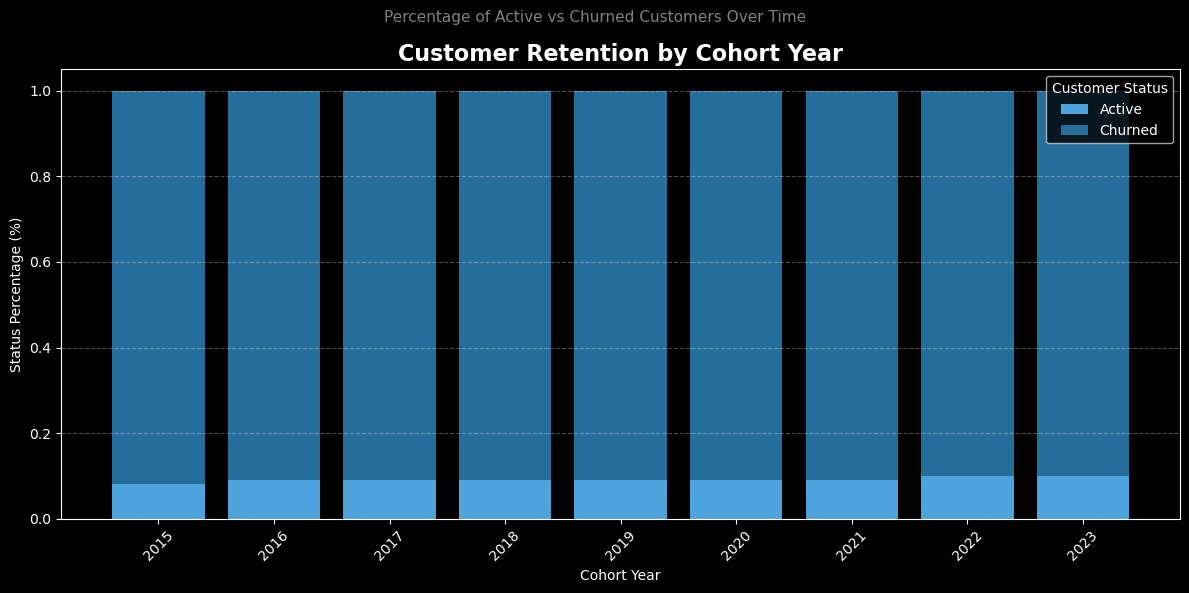

In [22]:
# Garante que os dados estejam no formato correto
df_3['cohort_year'] = df_3['cohort_year'].astype(str)
df_3['status_percentage'] = df_3['status_percentage'].astype(float)

# Pivotando a base para criar as colunas empilhadas
df_pivot = df_3.pivot(index='cohort_year', columns='customer_status', values='status_percentage')
df_pivot = df_pivot.fillna(0)  # Substitui valores nulos por 0

# Cores em tons do azul base
colors = {
    'Active': '#4FA3DD',
    'Churned': '#256E9C'
}

# Estilo dark
plt.style.use('dark_background')

# Tamanho da figura
plt.figure(figsize=(12, 6))

# Gráfico de barras empilhadas
bottom = None
for status in df_pivot.columns:
    plt.bar(
        df_pivot.index,
        df_pivot[status],
        bottom=bottom,
        label=status,
        color=colors.get(status, '#4FA3DD')  # Cor padrão caso não esteja no dicionário
    )
    # Atualiza o "bottom" para empilhar a próxima barra
    if bottom is None:
        bottom = df_pivot[status]
    else:
        bottom += df_pivot[status]

# Títulos e rótulos
plt.title('Customer Retention by Cohort Year', fontsize=16, fontweight='bold')
plt.suptitle('Percentage of Active vs Churned Customers Over Time', fontsize=11, color='gray')
plt.xlabel('Cohort Year')
plt.ylabel('Status Percentage (%)')

# Estética
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.legend(title='Customer Status')
plt.tight_layout()

# Salvar imagem
save_path = r'C:\Projetos_AnaliseDados\SQL_Project_Int\images\3_image.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')  # Salva com boa resolução

# Mostrar o gráfico
plt.show()


